In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('transaction_data.csv')

In [3]:
df.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom


In [4]:
df.shape

(1083818, 8)

In [5]:
df.dtypes

UserId                      int64
TransactionId               int64
TransactionTime            object
ItemCode                    int64
ItemDescription            object
NumberOfItemsPurchased      int64
CostPerItem               float64
Country                    object
dtype: object

In [6]:
#the most expensive items
df['CostPerItem'].sort_values( ascending=False).head()

320282    1696285.44
854978    1696285.44
769939      53778.60
638800      53778.60
253730      24614.32
Name: CostPerItem, dtype: float64

In [7]:
df.iloc[[320282,854978,769939,638800,253730]]

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
320282,288687,5900323,Mon Feb 12 06:37:00 IST 2018,465780,RETROSPOT LAMP,24,1696285.44,United Kingdom
854978,288687,5900323,Mon Feb 12 06:37:00 IST 2018,465780,RETROSPOT LAMP,24,1696285.44,United Kingdom
769939,317058,6120895,Wed Aug 22 11:31:00 IST 2018,-1,Manual,-3,53778.60,United Kingdom
638800,317058,6120895,Wed Aug 22 11:31:00 IST 2018,-1,Manual,-3,53778.60,United Kingdom
253730,-1,6386655,Sat Feb 16 07:36:00 IST 2019,-1,AMAZON FEE,-3,24614.32,United Kingdom


#### There are 4223 unique items

In [127]:
df['ItemDescription'].nunique()

4223

#### Most bought items

In [9]:
df['ItemDescription'].value_counts().head(10)

WHITE HANGING HEART T-LIGHT HOLDER    4738
REGENCY CAKESTAND 3 TIER              4400
JUMBO BAG RED RETROSPOT               4318
PARTY BUNTING                         3454
LUNCH BAG RED RETROSPOT               3276
ASSORTED COLOUR BIRD ORNAMENT         3002
SET OF 3 CAKE TINS PANTRY DESIGN      2946
PACK OF 72 RETROSPOT CAKE CASES       2770
LUNCH BAG  BLACK SKULL.               2700
NATURAL SLATE HEART CHALKBOARD        2560
Name: ItemDescription, dtype: int64

In [10]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Austria', 'Australia', 'EIRE',
       'Portugal', 'Germany', 'Sweden', 'Cyprus', 'Spain', 'Japan',
       'Belgium', 'Singapore', 'Denmark', 'Netherlands', 'Norway',
       'Canada', 'Iceland', 'Switzerland', 'Poland', 'Finland',
       'Hong Kong', 'Italy', 'Malta', 'Israel', 'Channel Islands',
       'Unspecified', 'USA', 'Czech Republic', 'Lebanon', 'Brazil',
       'European Community', 'Greece', 'RSA', 'Bahrain', 'Lithuania',
       'United Arab Emirates', 'Saudi Arabia'], dtype=object)

#### top 10 countries with most transactions

In [128]:
df['Country'].value_counts().head(10)

United Kingdom    990956
Germany            18990
France             17114
EIRE               16392
Spain               5066
Netherlands         4742
Belgium             4138
Switzerland         4004
Portugal            3038
Australia           2518
Name: Country, dtype: int64

#### Checking for null values in the dataframe

In [12]:
df.isnull().describe()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
count,1083818,1083818,1083818,1083818,1083818,1083818,1083818,1083818
unique,1,1,1,1,2,1,1,1
top,False,False,False,False,False,False,False,False
freq,1083818,1083818,1083818,1083818,1080910,1083818,1083818,1083818


In [13]:
df['ItemDescription'].isnull().value_counts()

False    1080910
True        2908
Name: ItemDescription, dtype: int64

#### top 5 transactionIds having most number of transactions

In [14]:
df['TransactionId'].value_counts().head(5)

6309435    2228
6393409    1498
6396412    1462
6388019    1442
6143225    1410
Name: TransactionId, dtype: int64

In [15]:
sum(df['TransactionId'].value_counts() > 1000)

49

In [16]:
df['TransactionId'].value_counts().tail()

6044852    2
6118552    2
6006044    2
6105825    2
6060780    2
Name: TransactionId, dtype: int64

In [17]:
#the 2228 transactions made by the transactionid=6309435
df[df['TransactionId'] == 6309435].head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
931,-1,6309435,Sat Jan 12 10:41:00 IST 2019,475839,LUNCH BOX I LOVE LONDON,12,5.70,United Kingdom
1943,-1,6309435,Sat Jan 12 10:41:00 IST 2019,487347,LUNCH BAG ALPHABET DESIGN,3,5.70,United Kingdom
2046,-1,6309435,Sat Jan 12 10:41:00 IST 2019,1786029,URBAN BLACK RIBBONS,15,1.15,United Kingdom
2566,-1,6309435,Sat Jan 12 10:41:00 IST 2019,465087,FELTCRAFT BUTTERFLY HEARTS,3,4.55,United Kingdom
3092,-1,6309435,Sat Jan 12 10:41:00 IST 2019,490413,6 GIFT TAGS VINTAGE CHRISTMAS,30,2.25,United Kingdom


In [18]:
#no of items having null description
df[df['ItemDescription'].isnull()].head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
322,-1,6314803,Mon Jan 14 11:15:00 IST 2019,495159,NaN,9,0.0,United Kingdom
762,-1,6206420,Mon Nov 05 05:34:00 IST 2018,434364,NaN,3,0.0,United Kingdom
1080,-1,6297863,Sat Jan 05 12:06:00 IST 2019,1782417,NaN,-3,0.0,United Kingdom
2204,-1,6142961,Mon Sep 10 09:41:00 IST 2018,458157,NaN,-240,0.0,United Kingdom
2210,-1,6176445,Mon Oct 08 10:06:00 IST 2018,1666056,NaN,108,0.0,United Kingdom


In [19]:
df[df['ItemDescription'].isnull()]['CostPerItem']

322        0.0
762        0.0
1080       0.0
2204       0.0
2210       0.0
          ... 
1080070    0.0
1080468    0.0
1080485    0.0
1080983    0.0
1083739    0.0
Name: CostPerItem, Length: 2908, dtype: float64

#### the items having null description also have cost 0 

In [129]:
sum(df[df['ItemDescription'].isnull()]['CostPerItem'] == 0)

2908

In [21]:
#number of items having costperitem =0
sum(df['CostPerItem'] == 0.0)

5030

In [22]:
dfna = df[df['CostPerItem'] == 0.0]
dfna

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
148,-1,6108674,Tue Aug 14 07:12:00 IST 2018,1780905,wet damaged,-288,0.0,United Kingdom
151,-1,5914040,Fri Feb 18 11:31:00 IST 2028,445872,STRAWBERRY CERAMIC TRINKET BOX,3,0.0,United Kingdom
322,-1,6314803,Mon Jan 14 11:15:00 IST 2019,495159,NaN,9,0.0,United Kingdom
432,-1,6173783,Sun Oct 07 07:52:00 IST 2018,1428,ebay,-30,0.0,United Kingdom
668,-1,6268713,Tue Dec 18 11:16:00 IST 2018,1890294,check,-36,0.0,United Kingdom
...,...,...,...,...,...,...,...,...
1082487,-1,6349893,Wed Jan 30 08:31:00 IST 2019,997563,found,198,0.0,United Kingdom
1083038,-1,6123590,Sun Aug 26 06:37:00 IST 2018,483105,printing smudges/thrown away,-28800,0.0,United Kingdom
1083099,-1,6357483,Sun Feb 03 08:09:00 IST 2019,490308,check,15,0.0,United Kingdom
1083738,-1,6332865,Tue Jan 22 13:58:00 IST 2019,1528842,check,-108,0.0,United Kingdom


In [23]:
#there are 376 items with cost 0  and  375 of them have a description
df[df['CostPerItem'] == 0.0]['ItemDescription'].nunique()

376

In [24]:
df[df['CostPerItem'] == 0.0]['ItemDescription'].unique()

array(['wet damaged', 'STRAWBERRY CERAMIC TRINKET BOX', nan, 'ebay',
       'check', 'BLUE POLKADOT LUGGAGE TAG ', 'JUMBO BAG STRAWBERRY',
       'found', 'sold as set on dotcom', 'mix up with c', 'CHECK',
       'Manual', 'damages', 'PAPER BUNTING VINTAGE PAISLEY',
       'POLKADOT RAIN HAT ', '?', 'alan hodge cant mamage this section',
       'HOLIDAY FUN LUDO', 'CHILDS GARDEN SPADE PINK', '???lost',
       'adjustment', 'CERAMIC STRAWBERRY MONEY BOX',
       'WHITE HANGING HEART T-LIGHT HOLDER', 'JUMBO BAG RED RETROSPOT',
       'Found', 'Damaged', 'damaged', 'returned', 'TOADSTOOL MONEY BOX',
       'FRENCH BLUE METAL DOOR SIGN 4', 'dotcomstock',
       'RED RETROSPOT BUTTER DISH', 'GLASS JAR KINGS CHOICE',
       'SPOTTY BUNTING', 'GREEN REGENCY TEACUP AND SAUCER',
       'TRAVEL SEWING KIT', 'WOODEN BOX OF DOMINOES', '? sold as sets?',
       'IVORY KITCHEN SCALES', 'KINGS CHOICE BISCUIT TIN',
       'DOORMAT RESPECTABLE HOUSE', 'CHILDRENS APRON SPACEBOY DESIGN',
       '?missing

In [25]:
t50 = df['TransactionId'].value_counts().head(50)
t50

6309435    2228
6393409    1498
6396412    1462
6388019    1442
6143225    1410
6377547    1374
6393387    1352
5911774    1350
6388030    1324
5918781    1304
6384037    1300
6381265    1290
6395829    1270
6390813    1258
6361784    1244
5921839    1240
6361817    1212
5914018    1202
5909607    1194
5905636    1186
6342787    1186
5902512    1184
5916053    1182
6345207    1170
6374588    1156
6347858    1144
5909640    1136
6350938    1122
6342798    1104
6345240    1088
6339729    1084
6371057    1082
5914326    1072
5919947    1068
6371156    1066
6387997    1058
6367284    1054
5901984    1054
6335230    1052
6355448    1052
6367097    1040
5933807    1036
6326936    1036
6339619    1036
6330247    1030
5939538    1024
6334625    1006
6374632    1006
5946061    1004
6358715     988
Name: TransactionId, dtype: int64

In [26]:
t50.index

Int64Index([6309435, 6393409, 6396412, 6388019, 6143225, 6377547, 6393387,
            5911774, 6388030, 5918781, 6384037, 6381265, 6395829, 6390813,
            6361784, 5921839, 6361817, 5914018, 5909607, 5905636, 6342787,
            5902512, 5916053, 6345207, 6374588, 6347858, 5909640, 6350938,
            6342798, 6345240, 6339729, 6371057, 5914326, 5919947, 6371156,
            6387997, 6367284, 5901984, 6335230, 6355448, 6367097, 5933807,
            6326936, 6339619, 6330247, 5939538, 6334625, 6374632, 5946061,
            6358715],
           dtype='int64')

In [27]:
#one of the top 50 spenders has appeared only once in the df with cost=0
dfna[dfna['TransactionId'].isin(t50.index)]

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
436379,-1,5918781,Tue Feb 20 10:09:00 IST 2018,474285,PACK OF 6 BIRDY GIFT TAGS,3,0.0,United Kingdom
1035173,-1,5918781,Tue Feb 20 10:09:00 IST 2018,474285,PACK OF 6 BIRDY GIFT TAGS,3,0.0,United Kingdom


In [28]:
fitems = df[df['CostPerItem'] == 0.0]['ItemDescription'].unique()
fitems

array(['wet damaged', 'STRAWBERRY CERAMIC TRINKET BOX', nan, 'ebay',
       'check', 'BLUE POLKADOT LUGGAGE TAG ', 'JUMBO BAG STRAWBERRY',
       'found', 'sold as set on dotcom', 'mix up with c', 'CHECK',
       'Manual', 'damages', 'PAPER BUNTING VINTAGE PAISLEY',
       'POLKADOT RAIN HAT ', '?', 'alan hodge cant mamage this section',
       'HOLIDAY FUN LUDO', 'CHILDS GARDEN SPADE PINK', '???lost',
       'adjustment', 'CERAMIC STRAWBERRY MONEY BOX',
       'WHITE HANGING HEART T-LIGHT HOLDER', 'JUMBO BAG RED RETROSPOT',
       'Found', 'Damaged', 'damaged', 'returned', 'TOADSTOOL MONEY BOX',
       'FRENCH BLUE METAL DOOR SIGN 4', 'dotcomstock',
       'RED RETROSPOT BUTTER DISH', 'GLASS JAR KINGS CHOICE',
       'SPOTTY BUNTING', 'GREEN REGENCY TEACUP AND SAUCER',
       'TRAVEL SEWING KIT', 'WOODEN BOX OF DOMINOES', '? sold as sets?',
       'IVORY KITCHEN SCALES', 'KINGS CHOICE BISCUIT TIN',
       'DOORMAT RESPECTABLE HOUSE', 'CHILDRENS APRON SPACEBOY DESIGN',
       '?missing

In [29]:
df[df['ItemDescription'].isin(fitems)]

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
11,372897,6199061,Mon Oct 29 09:04:00 IST 2018,459669,WOODEN BOX OF DOMINOES,3,1.73,United Kingdom
24,-1,6212987,Sun Nov 11 08:02:00 IST 2018,443436,OWL DOORSTOP,3,11.45,United Kingdom
35,355383,6335252,Fri Jan 25 06:35:00 IST 2019,435204,RED RETROSPOT CHARLOTTE BAG,30,1.18,United Kingdom
41,344946,6383036,Wed Feb 13 08:59:00 IST 2019,469875,AIRLINE BAG VINTAGE JET SET BROWN,3,5.87,United Kingdom
62,339213,6197070,Sun Oct 28 05:34:00 IST 2018,452319,RED RETROSPOT BUTTER DISH,18,6.84,United Kingdom
...,...,...,...,...,...,...,...,...
1083791,343770,6066181,Tue Jul 10 12:40:00 IST 2018,475692,TRAVEL SEWING KIT,3,2.28,United Kingdom
1083793,374661,6187060,Wed Oct 17 07:19:00 IST 2018,455133,WHITE SPOT BLUE CERAMIC DRAWER KNOB,72,1.73,United Kingdom
1083803,290115,5962880,Sun Apr 08 08:16:00 IST 2018,452781,DINOSAUR LUNCH BOX WITH CUTLERY,18,3.52,Germany
1083806,266196,6341709,Sun Jan 27 08:25:00 IST 2019,473613,PLASTERS IN TIN SKULLS,36,2.28,Sweden


#### items which costed 0 in the intial analysis also have cost values > 0 so they must be failed transactions or free transactions

In [31]:
df[df['ItemDescription'] == 'WOODEN BOX OF DOMINOES']

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
11,372897,6199061,Mon Oct 29 09:04:00 IST 2018,459669,WOODEN BOX OF DOMINOES,3,1.73,United Kingdom
1716,365001,5909585,Sat Feb 17 05:45:00 IST 2018,459669,WOODEN BOX OF DOMINOES,648,1.47,United Kingdom
3110,286818,6374940,Mon Feb 11 06:11:00 IST 2019,459669,WOODEN BOX OF DOMINOES,36,1.73,United Kingdom
3324,-1,5919947,Wed Feb 21 05:51:00 IST 2018,459669,WOODEN BOX OF DOMINOES,3,3.47,United Kingdom
3722,293622,6310315,Sat Jan 12 12:24:00 IST 2019,459669,WOODEN BOX OF DOMINOES,18,1.73,United Kingdom
...,...,...,...,...,...,...,...,...
1082079,291480,6111534,Sat Aug 18 06:09:00 IST 2018,459669,WOODEN BOX OF DOMINOES,36,1.73,United Kingdom
1082433,367941,6331193,Tue Jan 22 07:22:00 IST 2019,459669,WOODEN BOX OF DOMINOES,36,1.73,United Kingdom
1082605,-1,6347858,Tue Jan 29 11:17:00 IST 2019,459669,WOODEN BOX OF DOMINOES,9,3.40,United Kingdom
1082814,267351,5920156,Wed Feb 21 06:56:00 IST 2018,459669,WOODEN BOX OF DOMINOES,72,1.73,France


In [32]:
#there are 25,900 unique transactions so we'll work with this for the collaborative filtering
df['TransactionId'].nunique()

25900

#### our top shopper here has bought 1108 items and some of the items have repeated transactions

In [33]:
#our top shopper here has bought 1108 items and some of the items have repeated transactions
df[df['TransactionId'] == 6309435]['ItemDescription'].value_counts()

LARGE WHITE HEART OF WICKER            4
TRAVEL CARD WALLET KEEP CALM           4
CHARLIE LOLA BLUE HOT WATER BOTTLE     4
WALL ART LOVES' SECRET                 4
WOOD STOCKING CHRISTMAS SCANDISPOT     4
                                      ..
SET 7 BABUSHKA NESTING BOXES           2
 I LOVE LONDON MINI BACKPACK           2
MIRRORED WALL ART PHOTO FRAMES         2
VINTAGE CHRISTMAS BUNTING              2
EGG FRYING PAN RED                     2
Name: ItemDescription, Length: 1108, dtype: int64

#### lets clean up the failed or free transactions first

In [35]:
fail = dfna.index
fail


Int64Index([    148,     151,     322,     432,     668,     762,    1080,
               1427,    1546,    1734,
            ...
            1080983, 1081034, 1081373, 1081708, 1082412, 1082487, 1083038,
            1083099, 1083738, 1083739],
           dtype='int64', length=5030)

In [36]:
df_new = df.drop(fail,axis=0)
df_new

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom
...,...,...,...,...,...,...,...,...
1083813,313131,6040298,Mon Jun 18 09:18:00 IST 2018,437976,DENIM PATCH PURSE PINK BUTTERFLY,30,2.28,EIRE
1083814,295743,6387117,Sat Feb 16 09:14:00 IST 2019,484113,RECYCLED ACAPULCO MAT PINK,6,11.39,United Kingdom
1083815,-1,6361817,Tue Feb 05 05:26:00 IST 2019,497595,DOILY THANK YOU CARD,15,1.15,United Kingdom
1083816,324765,5945500,Fri Mar 23 06:26:00 IST 2018,470883,REGENCY CAKESTAND 3 TIER,48,15.12,United Kingdom


In [37]:
#there are no more null values or failed transactions
df_new.isnull().describe()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
count,1078788,1078788,1078788,1078788,1078788,1078788,1078788,1078788
unique,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False
freq,1078788,1078788,1078788,1078788,1078788,1078788,1078788,1078788


### Applying Transactions based collaborative filtering on the dataset to get the similar Transactions with frequently bought products

In [39]:
df_new.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom


In [40]:
df_new['ItemCode'].nunique()

3306

In [41]:
df_new['ItemDescription'].nunique()

4042

#### some of the item codes are being repeated for different items

In [43]:
df_new['ItemCode'].value_counts()

 1787079    7926
-1          5564
 1787583    4748
 998886     4408
 470883     4396
            ... 
 1776894       2
 1786365       2
 449652        2
 496188        2
 1781619       2
Name: ItemCode, Length: 3306, dtype: int64

In [44]:
df_new[df_new['ItemCode'] == 1787079 ]

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
76,-1,5986211,Tue May 01 06:11:00 IST 2018,1787079,JUMBO BAG BAROQUE BLACK WHITE,15,5.70,United Kingdom
145,300258,6255425,Mon Dec 10 09:32:00 IST 2018,1787079,JUMBO BAG RED RETROSPOT,60,2.48,United Kingdom
174,-1,6376634,Mon Feb 11 10:11:00 IST 2019,1787079,JUMBO BAG BAROQUE BLACK WHITE,3,5.70,United Kingdom
429,263571,5932861,Wed Feb 28 07:23:00 IST 2018,1787079,JUMBO BAG BAROQUE BLACK WHITE,30,2.70,Spain
471,376131,6377294,Mon Feb 11 10:52:00 IST 2019,1787079,JUMBO BAG RED RETROSPOT,24,2.88,United Kingdom
...,...,...,...,...,...,...,...,...
1083397,297276,5984814,Sun Apr 29 10:49:00 IST 2018,1787079,JUMBO BAG STRAWBERRY,6,2.70,EIRE
1083409,308007,6223118,Sun Nov 18 08:30:00 IST 2018,1787079,JUMBO BAG RED RETROSPOT,150,2.88,United Kingdom
1083487,306747,6361949,Tue Feb 05 06:35:00 IST 2019,1787079,JUMBO BAG RED RETROSPOT,300,2.48,United Kingdom
1083544,273777,6027593,Sat Jun 09 11:42:00 IST 2018,1787079,JUMBO BAG STRAWBERRY,30,2.70,United Kingdom


#### same item with different colors have same item code

In [46]:
df_new[df_new['ItemCode'] == -1]['ItemDescription'].unique()

array(['POSTAGE', 'Discount', 'DOTCOM POSTAGE', 'AMAZON FEE', 'Manual',
       'SAMPLES', 'GIRLS PARTY BAG', 'Bank Charges', 'BOYS PARTY BAG',
       'Adjust bad debt', 'CRUK Commission', 'PADS TO MATCH ALL CUSHIONS'],
      dtype=object)

#### the items with itemcode -1 are just miscellaneous stuff lets clean em up

In [48]:
df_new[df_new['ItemCode'] == -1]['ItemDescription'].value_counts()

POSTAGE                       2504
DOTCOM POSTAGE                1414
Manual                        1132
Discount                       154
SAMPLES                        126
Bank Charges                    74
AMAZON FEE                      68
CRUK Commission                 32
GIRLS PARTY BAG                 26
BOYS PARTY BAG                  22
Adjust bad debt                  6
PADS TO MATCH ALL CUSHIONS       6
Name: ItemDescription, dtype: int64

In [49]:
mis= df_new[df_new['ItemCode'] == -1].index
mis

Int64Index([    154,     251,     993,    1261,    1293,    1626,    1773,
               2030,    2064,    2263,
            ...
            1082314, 1082767, 1082783, 1082835, 1083108, 1083208, 1083250,
            1083503, 1083581, 1083780],
           dtype='int64', length=5564)

In [50]:
df_n2 = df_new.drop(mis,axis=0)
df_n2

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,337701,6283376,Wed Dec 26 09:06:00 IST 2018,482370,LONDON BUS COFFEE MUG,3,3.52,United Kingdom
2,267099,6385599,Fri Feb 15 09:45:00 IST 2019,490728,SET 12 COLOUR PENCILS DOLLY GIRL,72,0.90,France
3,380478,6044973,Fri Jun 22 07:14:00 IST 2018,459186,UNION JACK FLAG LUGGAGE TAG,3,1.73,United Kingdom
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom
...,...,...,...,...,...,...,...,...
1083813,313131,6040298,Mon Jun 18 09:18:00 IST 2018,437976,DENIM PATCH PURSE PINK BUTTERFLY,30,2.28,EIRE
1083814,295743,6387117,Sat Feb 16 09:14:00 IST 2019,484113,RECYCLED ACAPULCO MAT PINK,6,11.39,United Kingdom
1083815,-1,6361817,Tue Feb 05 05:26:00 IST 2019,497595,DOILY THANK YOU CARD,15,1.15,United Kingdom
1083816,324765,5945500,Fri Mar 23 06:26:00 IST 2018,470883,REGENCY CAKESTAND 3 TIER,48,15.12,United Kingdom


In [51]:
df_n2['TransactionId'] == -1

0          False
1          False
2          False
3          False
4          False
           ...  
1083813    False
1083814    False
1083815    False
1083816    False
1083817    False
Name: TransactionId, Length: 1073224, dtype: bool

In [52]:
df_n2[df_n2['UserId'] == -1]

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
4,-1,6143225,Mon Sep 10 11:58:00 IST 2018,1733592,WASHROOM METAL SIGN,3,3.40,United Kingdom
7,-1,6143225,Mon Sep 10 11:58:00 IST 2018,447867,SKULLS WRITING SET,120,1.15,United Kingdom
13,-1,6058140,Mon Jul 02 07:33:00 IST 2018,435225,LUNCH BAG RED RETROSPOT,60,6.85,United Kingdom
17,-1,6288843,Sun Dec 30 12:58:00 IST 2018,489594,VINTAGE CHRISTMAS TABLECLOTH,3,34.45,United Kingdom
23,-1,6388019,Sat Feb 16 13:24:00 IST 2019,490329,ROLL WRAP VINTAGE CHRISTMAS,30,3.40,United Kingdom
...,...,...,...,...,...,...,...,...
1083798,-1,6079524,Sun Jul 22 11:09:00 IST 2018,1787772,CHARLIE + LOLA BISCUITS TINS,3,11.45,United Kingdom
1083801,-1,6212338,Sun Nov 11 06:39:00 IST 2018,446166,RED RETROSPOT BIG BOWL,3,5.70,United Kingdom
1083804,-1,6272057,Wed Dec 19 11:09:00 IST 2018,458031,HANGING HEART WITH BELL,24,1.15,United Kingdom
1083810,-1,6106650,Sun Aug 12 11:53:00 IST 2018,446040,BLUE POLKADOT CUP,6,2.25,United Kingdom


#### around 20% of the transactions have userid=-1 so we will work with the transactionid for the rating feature

In [54]:
#using the item code for the collab. filtering 

In [55]:
df_n2['TransactionId'].value_counts()

6309435    2226
6393409    1496
6396412    1460
6388019    1440
6143225    1408
           ... 
5932344       2
6006044       2
6338662       2
6062584       2
5924545       2
Name: TransactionId, Length: 23198, dtype: int64

In [56]:
rate = df_n2.groupby('TransactionId').get_group(6309435)
rate

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
931,-1,6309435,Sat Jan 12 10:41:00 IST 2019,475839,LUNCH BOX I LOVE LONDON,12,5.70,United Kingdom
1943,-1,6309435,Sat Jan 12 10:41:00 IST 2019,487347,LUNCH BAG ALPHABET DESIGN,3,5.70,United Kingdom
2046,-1,6309435,Sat Jan 12 10:41:00 IST 2019,1786029,URBAN BLACK RIBBONS,15,1.15,United Kingdom
2566,-1,6309435,Sat Jan 12 10:41:00 IST 2019,465087,FELTCRAFT BUTTERFLY HEARTS,3,4.55,United Kingdom
3092,-1,6309435,Sat Jan 12 10:41:00 IST 2019,490413,6 GIFT TAGS VINTAGE CHRISTMAS,30,2.25,United Kingdom
...,...,...,...,...,...,...,...,...
1079902,-1,6309435,Sat Jan 12 10:41:00 IST 2019,998886,PARTY BUNTING,3,14.90,United Kingdom
1080649,-1,6309435,Sat Jan 12 10:41:00 IST 2019,470904,ENAMEL BREAD BIN CREAM,9,34.45,United Kingdom
1080943,-1,6309435,Sat Jan 12 10:41:00 IST 2019,754404,HANGING FAIRY CAKE DECORATION,3,5.70,United Kingdom
1083043,-1,6309435,Sat Jan 12 10:41:00 IST 2019,1788549,PINK LOVE BIRD CANDLE,6,3.40,United Kingdom


In [57]:
rate.groupby('ItemCode').get_group(1786029)

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
2046,-1,6309435,Sat Jan 12 10:41:00 IST 2019,1786029,URBAN BLACK RIBBONS,15,1.15,United Kingdom
87983,-1,6309435,Sat Jan 12 10:41:00 IST 2019,1786029,TRADITIONAL CHRISTMAS RIBBONS,15,3.40,United Kingdom
245225,-1,6309435,Sat Jan 12 10:41:00 IST 2019,1786029,URBAN BLACK RIBBONS,15,1.15,United Kingdom
470297,-1,6309435,Sat Jan 12 10:41:00 IST 2019,1786029,ROMANTIC PINKS RIBBONS,3,3.40,United Kingdom
472155,-1,6309435,Sat Jan 12 10:41:00 IST 2019,1786029,ROMANTIC PINKS RIBBONS,3,3.40,United Kingdom
748131,-1,6309435,Sat Jan 12 10:41:00 IST 2019,1786029,TRADITIONAL CHRISTMAS RIBBONS,15,3.40,United Kingdom
921307,-1,6309435,Sat Jan 12 10:41:00 IST 2019,1786029,SCANDINAVIAN REDS RIBBONS,6,3.40,United Kingdom
964396,-1,6309435,Sat Jan 12 10:41:00 IST 2019,1786029,SCANDINAVIAN REDS RIBBONS,6,3.40,United Kingdom


#### the duplicates will have to be removed for the item description with the same transaction id and item code as its unnecessary

In [58]:
sum(rate.drop_duplicates('ItemDescription')['ItemCode'] == 1786029)

4

#### we will consider the numberofitems purchased as the rating feature for each itemcode

In [60]:
#lets dropduplicates for the rest of the transactionids

In [61]:
rate['ItemDescription'].value_counts()

LARGE WHITE HEART OF WICKER            4
TRAVEL CARD WALLET KEEP CALM           4
CHARLIE LOLA BLUE HOT WATER BOTTLE     4
WALL ART LOVES' SECRET                 4
WOOD STOCKING CHRISTMAS SCANDISPOT     4
                                      ..
SET 7 BABUSHKA NESTING BOXES           2
 I LOVE LONDON MINI BACKPACK           2
MIRRORED WALL ART PHOTO FRAMES         2
VINTAGE CHRISTMAS BUNTING              2
EGG FRYING PAN RED                     2
Name: ItemDescription, Length: 1107, dtype: int64

In [62]:
rate.drop_duplicates('ItemDescription')['ItemDescription'].value_counts()

HEART DECORATION WITH PEARLS           1
YELLOW GIANT GARDEN THERMOMETER        1
SET 6 PAPER TABLE LANTERN STARS        1
KNITTED UNION FLAG HOT WATER BOTTLE    1
SET OF 12 FAIRY CAKE BAKING CASES      1
                                      ..
DAISY HAIR COMB                        1
BLACK ENCHANTED FOREST PLACEMAT        1
SET 7 BABUSHKA NESTING BOXES           1
 I LOVE LONDON MINI BACKPACK           1
EGG FRYING PAN RED                     1
Name: ItemDescription, Length: 1107, dtype: int64

In [63]:
df_n2['TransactionId'].unique()

array([6355745, 6283376, 6385599, ..., 6231192, 5995748, 5918825],
      dtype=int64)

In [64]:
df_n3 = df_n2.groupby('TransactionId').get_group(6355745).drop_duplicates('ItemDescription')

In [65]:
df_n3 = pd.DataFrame()

In [66]:
df_n3

""


In [165]:
for i in df_n2['TransactionId'].unique():
    print(i)
    dup = df_n2.groupby('TransactionId').get_group(i)
#     print(len(dup))
    df_n3 = pd.concat([df_n3,dup.drop_duplicates('ItemDescription')],ignore_index=True, sort=False)
    print(len(df_n3))

6355745
24
6283376
76
6385599
96
6044973
153
6143225
855
6307136
871
6162981
953
6255403
964
6387425
1005
6262696
1045
6199061
1073
6358242
1135
6058140
1214
6254358
1234
6328674
1257
6075883
1286
6288843
1549
6064025
1579
6223569
1613
6031883
1633
6257163
1683
5945093
1697
6388019
2417
6212987
2619
6309336
3052
6101095
3057
6344448
3068
6217541
3233
6370276
3266
6212294
3531
6167568
3550
6244425
3595
5968743
3636
5984385
3657
6335252
3703
5934412
3981
5952144
4338
6090810
4373
5976399
4426
5940143
4460
6383036
4509
5995253
4550
5925458
4566
6339795
4598
6079370
4650
6197884
4735
5962924
4756
6226627
4784
6150430
4788
6149418
4866
6183606
4893
6275643
4910
6288656
4927
6359661
4946
6379318
5019
6249595
5041
6390813
5669
6212019
5734
6244777
5743
6232842
5767
6169504
5791
6197070
5809
6321260
5893
6057161
6017
6238023
6040
5927790
6093
6309061
6145
5956676
6424
6015757
6428
6246383
6538
6396412
7268
6314814
7671
6104560
7715
6266689
7750
6340114
7769
5986211
7837
6137318
8028
6300426
80

54288
5981932
54347
6202966
54372
6228343
54446
6172243
54551
6002876
54605
6133809
54635
6340070
54650
6246526
54724
6218465
54741
6381760
54797
6084782
54943
6077654
55136
5980843
55240
6106309
55250
6347682
55261
6121522
55293
6327354
55317
5994978
55352
6317311
55370
6379780
55397
6111534
55414
6271045
55428
6163102
55442
6355932
55458
5902512
56046
5992932
56261
6324428
56269
6005043
56283
5957523
56329
6234602
56330
6244370
56555
6275533
56566
6180482
56586
6015724
56765
6257141
56804
5935545
57070
6024161
57148
6240806
57157
6355701
57220
5963199
57308
6323229
57368
6147207
57403
6367097
57922
5966642
57940
5909640
58506
6144754
58893
6021235
59030
5929044
59039
6195629
59058
6138627
59097
6015350
59192
6164048
59305
6225109
59559
6013073
59589
6274719
59593
6246911
59820
6130465
59845
6228640
59869
6374588
60446
6236549
60490
6285488
60558
6121819
60581
5926789
60640
6069987
60658
5929583
60702
6358209
60737
5947491
61024
5943905
61137
6109598
61169
6123337
61173
6035370
61227


100295
6383938
100334
6026163
100349
5915118
100366
6088940
100413
6281682
100436
6217585
100465
6321777
100541
6194837
100564
6145007
100598
6007727
100603
5978137
100801
6374401
100852
6026031
100856
6171891
100881
6250222
100917
6380968
100924
6191306
101009
6112645
101014
5980117
101031
6151079
101033
6168008
101051
6023270
101059
6161133
101072
6146547
101403
6362059
101423
5902908
101439
6277623
101496
6219741
101574
6201041
101591
6060846
101743
6093021
101768
6209786
101801
6021125
101835
6118607
102077
6164774
102519
5977180
102526
6058547
102550
6171748
102580
5935523
102612
6347627
102744
6168503
103077
6105803
103097
6356449
103118
6261607
103124
6261706
103403
6234668
103429
6180878
103473
6351719
103490
6199380
103560
6315133
103582
6250178
103645
6087290
103737
6254490
103762
6163289
103793
6304540
103808
6226660
104046
6342853
104053
6264082
104066
6361850
104080
6325561
104120
6002711
104183
6195255
104220
5930991
104250
5945302
104284
6186697
104320
6333426
104349
601

134513
5966323
134588
6214945
134628
6248627
134761
6375281
134791
6190569
134879
5907253
134904
6142081
134978
6123854
134984
6009025
135000
6177611
135021
6258901
135078
6272057
135396
5998839
135430
5973440
135658
6261541
135702
6114328
135723
6259407
135791
6266183
135891
6019783
135958
6146327
135981
6337089
136008
6006374
136028
6127352
136038
6095012
136053
6255667
136070
6135382
136099
6157624
136108
6120763
136161
6051749
136175
6126087
136312
6081955
136347
6231874
136413
5961879
136436
6378240
136446
6037493
136491
5972879
136499
6162750
136527
6264885
136561
6238870
136658
6159824
136714
6026966
136777
6114361
136880
6169163
136911
5968490
136921
6187808
136974
6269703
136975
6039517
137005
6321370
137063
6300921
137084
6055852
137119
5933994
137128
6155094
137148
6355085
137159
5909596
137168
6115164
137311
6048933
137336
5964706
137352
5932091
137382
6235944
137401
6205892
137478
6214615
137500
6162882
137516
6146514
137825
6035810
137842
6152630
137871
6062980
137877
632

164453
6002227
164509
6313923
164549
6386589
164571
6355635
164624
6232677
164668
6205903
164706
6395763
164778
6167953
164866
6083187
164940
6251454
164982
6351334
164986
6090469
165010
6323141
165024
5905460
165034
6321491
165054
5922114
165104
6288711
165159
6179921
165160
5973308
165179
6203516
165184
5926888
165227
6088885
165273
6185025
165306
6189568
165469
6147768
165552
5995726
165590
6248561
165618
6246746
165629
6299227
165641
5987729
165673
5922983
165699
6192450
165717
5931365
165754
6123062
165774
6072396
165795
6068205
165815
6221215
165831
5943949
165856
6166633
165875
6224251
166063
6228673
166064
6181263
166102
6342325
166121
6104923
166161
6117243
166199
6232391
166306
6072671
166353
6221754
166364
6024293
166432
6390978
166450
6055665
166504
6294046
166553
6140013
166571
6064201
166618
6125746
166636
6387117
166708
5913633
166723
6389988
166772
5957490
166799
6075762
166801
6370595
166843
6228123
166898
5989192
166912
5949152
167038
6160275
167092
6335472
167148
603

189054
6150045
189081
6035326
189160
6186279
189174
6027692
189179
6055775
189206
6232534
189213
6231247
189241
6191218
189260
6199743
189430
5921597
189452
6395345
189472
6075190
189549
6254512
189567
6020597
189597
6045116
189644
6230422
189656
6374445
189664
6040265
189699
5935446
189726
6222128
189787
5965784
189966
6118255
189979
6122996
190167
6081372
190225
5900499
190276
6186939
190306
6157921
190321
6233986
190395
6002007
190415
6106650
190590
6308599
190605
6317740
190629
6025668
190805
6147636
190854
6098081
190882
6266172
190904
6270957
190982
6121434
191045
6150793
191364
6180570
191444
6104406
191461
6015999
191482
5925051
191519
6104648
191533
5994252
191544
6195783
191570
6326287
191684
6315518
191688
6220016
191734
5977708
191774
6104901
191806
6221369
191852
6056787
191873
6306740
192006
6270022
192030
5914348
192032
6174916
192043
5941815
192046
6242654
192055
6080459
192106
6137582
192140
6267679
192164
6145810
192173
6344096
192177
6365315
192188
6180020
192355
617

214723
5915679
214737
5951055
214766
6060065
214796
5932355
214816
6117188
215035
5989280
215078
6269109
215106
6333316
215140
6026130
215301
6232193
215321
6284146
215393
6360882
215487
5988884
215510
6154170
215511
5920805
215562
6215737
215631
6228431
215816
6015713
215832
6332007
215892
6216639
215906
6110764
215945
5911477
215951
6347275
215974
6118123
215997
6359221
216002
6250695
216031
6247725
216059
6233942
216071
6111292
216118
5972219
216151
6180559
216190
6152520
216208
5942717
216362
6353039
216449
6259396
216468
5985683
216508
6007892
216538
5973396
216556
6026603
216578
6203483
216597
6106243
216603
6078754
216634
6232160
216660
6187687
216751
6271056
216779
6016120
216796
6274884
216822
6325495
216828
5957941
216899
6194705
216913
6070790
216919
6028121
217008
6168877
217037
6190470
217081
6016923
217124
5966488
217165
5989071
217209
6094616
217216
6380616
217217
5969106
217254
6330489
217271
6169812
217306
6353699
217378
6025921
217395
5985122
217409
6154577
217440
596

237233
6345889
237265
6111908
237281
6030398
237297
5908441
237332
5977928
237436
6208752
237468
6010026
237487
6381012
237546
6245998
237619
6284608
237717
6213020
237854
5972956
237863
6223811
237888
6286478
237971
6348727
238015
6098312
238034
6095023
238064
5960625
238083
6135305
238093
6365425
238131
5932663
238151
6194650
238162
6253445
238178
6110896
238189
6180812
238198
6272574
238231
6077995
238243
6101634
238461
6093109
238488
6307257
238553
6197697
238589
6036008
238656
6017825
238687
6041849
238697
6268174
238724
5999576
238745
5970041
238764
6270000
238793
6277535
238828
6206046
238857
6024964
238864
6240278
238877
5993944
238896
6180669
238930
6025635
239004
6390560
239037
6353622
239053
6295509
239085
6070009
239091
6052211
239123
6173266
239146
6088720
239162
6125702
239195
6154467
239235
6209313
239272
5973143
239440
6355206
239465
6141476
239496
6263367
239511
6286225
239589
5994043
239615
6343205
239639
6086872
239650
6017803
239680
6081537
239705
6064124
239749
611

277989
6247571
277992
6000973
278021
6297324
278061
6112744
278083
6228508
278088
6352885
278165
6262707
278171
6393926
278227
6141608
278255
6087059
278281
6085244
278306
6022665
278320
6225274
278339
6106254
278354
6249804
278387
6005263
278415
6015339
278438
6342589
278495
6261321
278520
6017693
278791
6385555
278828
6342490
278888
6287545
278893
6116957
278932
6302659
278971
5968633
278985
6244711
279000
6312911
279022
6368483
279059
5950923
279072
6033423
279082
6208147
279094
5998432
279122
5945203
279252
6162046
279269
6181021
279331
6032290
279333
5994329
279339
6135602
279359
6266645
279404
6354359
279411
6085189
279469
5904657
279482
5987344
279524
6076851
279530
5994362
279554
6153620
279564
6161023
279578
5904822
279586
6051430
279640
6146932
279674
6205507
279688
5917593
279702
6255546
279755
5937129
279828
6348837
279887
6008673
279906
6234514
279919
6255337
279951
6387645
280059
6042575
280089
6106804
280102
6055962
280273
6135371
280290
6072561
280350
6284014
280399
614

296613
5952463
296647
6051914
296653
6209445
296666
6340334
296692
6198313
296695
6351499
296712
6147647
296783
6268086
296803
6180779
296834
6188061
296877
5995286
296881
6149330
296890
6373477
296897
5940253
296942
6282353
296991
6306179
297032
6321524
297087
6156810
297097
5931871
297128
6167876
297198
6142037
297240
6034644
297255
6010191
297264
5962066
297292
6026999
297326
6138297
297339
6303726
297369
6010730
297390
6189821
297476
6132291
297527
6246086
297540
6126483
297573
6232611
297618
6273157
297660
6342754
297717
6219411
297768
6057018
297918
6374775
297942
6228101
297966
6193132
298015
6300305
298070
6002447
298079
5951165
298093
6346153
298124
6118673
298276
5988312
298298
6302285
298324
5902281
298342
6358319
298366
6304287
298399
6192648
298418
6296983
298427
5932278
298436
6375160
298466
6026042
298514
6350267
298596
6012996
298618
6139342
298632
6253907
298638
6240377
298662
6246702
298690
6223800
298730
5949108
298750
6281484
298762
5923654
298809
6259297
298849
590

328960
6090733
328993
5944444
329009
6278877
329031
6010048
329047
6067149
329053
6250464
329073
6229465
329098
6335879
329152
6370342
329158
6277326
329169
5932135
329177
6026108
329186
6156293
329189
6087147
329209
6158779
329218
6292990
329240
6220071
329255
6247703
329276
5911059
329325
5993999
329363
6217750
329371
6314308
329373
6152245
329391
6087125
329430
6154918
329469
6042267
329475
6325616
329476
6016142
329508
6297599
329526
6294365
329550
6359133
329559
6374423
329577
6263510
329587
6110368
329638
6135811
329667
6209258
329668
6209896
329708
6104736
329730
6098114
329732
5968578
329751
6018089
329761
6229201
329868
6288392
329882
6171814
329897
6069041
329925
5914546
329928
6025646
329974
6072418
329994
6002205
330037
6288788
330049
5975552
330063
6011775
330079
6046909
330087
6168558
330114
6190030
330127
6248660
330254
6059911
330272
5963133
330324
6228926
330350
6128573
330369
6218212
330387
6081383
330401
6029661
330418
5922070
330465
6125020
330482
6311888
330516
625

343651
6348089
343665
5902501
343705
6162783
343727
6258032
343764
6173255
343780
6116253
343805
6065224
343813
6056930
343878
6049461
343902
6066687
343950
6288590
343971
6319907
343978
6113965
344027
6306960
344046
5973418
344051
6010565
344069
5922004
344087
6171275
344158
6045083
344184
6094143
344210
5937173
344237
6209874
344257
5924127
344259
5942827
344272
6299645
344296
5918935
344299
5979006
344438
6269252
344449
5968567
344461
6171407
344503
6062760
344568
6074849
344589
6130003
344599
5944994
344607
6118178
344644
5909244
344676
6336748
344691
5945544
344714
6270121
344739
5994659
344757
6083814
344837
6017231
344850
6215484
344857
5998300
344876
5957501
344893
6223261
344921
6033060
344966
5981833
345023
6373741
345024
6169383
345057
5923621
345073
6075157
345080
6177897
345123
6023050
345129
6216309
345150
5958678
345185
6051496
345197
6153642
345212
6297709
345219
6209885
345243
6367119
345260
6345119
345264
6034105
345279
6081042
345317
5926954
345342
5975167
345356
607

358227
6037559
358243
5968721
358289
6079810
358331
6299150
358365
6041838
358383
6195717
358388
6167601
358417
6088093
358461
6124690
358477
6023413
358489
6103251
358490
6279636
358511
6079931
358528
5915888
358545
6336660
358559
5964915
358582
6254072
358587
6090799
358602
6299898
358614
6317531
358645
6045358
358677
6308500
358715
6250167
358745
6176137
358752
6396192
358769
6282980
358803
5926899
358814
5907396
358845
6393651
358863
6111996
358885
6337991
358921
5953970
358937
6294398
358960
5903029
358976
6154929
358996
6090821
359010
6179756
359017
6186576
359027
6069976
359059
6025910
359072
6115175
359208
6170780
359211
6130619
359216
6277348
359233
6289052
359246
6331721
359257
6101854
359314
6271078
359321
5931717
359337
6196861
359380
6130179
359404
6026207
359418
6116869
359431
6347264
359469
5961428
359486
6299403
359505
5911851
359545
6180460
359560
6057832
359600
6085112
359616
5952331
359626
6292715
359680
6045039
359682
6075608
359693
6053256
359710
6369297
359719
624

371545
6078281
371565
5906813
371573
5929484
371638
6381540
371680
5956830
371715
6001622
371728
6093758
371734
6114438
371747
6024733
371780
6257977
371803
6084826
371816
6053751
371835
6206024
371873
6355239
371913
5929132
371921
6254314
371942
6234690
371968
6378174
371975
6344712
371986
6069943
371999
6155028
372026
6197774
372051
6144237
372066
6277293
372073
5935490
372090
5988895
372144
6177798
372155
6097553
372178
6120587
372179
6154599
372196
6190690
372206
6072495
372230
6010246
372240
6195211
372263
6385665
372275
6090238
372310
6198863
372364
6207993
372382
5955455
372402
6004196
372405
5925854
372431
6353666
372452
6300118
372458
6186323
372485
6316761
372502
6102668
372516
6287919
372555
6121896
372584
5968435
372600
6186268
372619
5907638
372631
6192076
372636
6257603
372648
6031399
372713
6260232
372720
5970140
372723
6121005
372741
6188303
372746
6219466
372756
5987740
372761
6316772
372770
6331611
372795
6286566
372803
6277139
372820
6093241
372843
6379582
372849
633

383771
6286555
383802
6042333
383814
6385951
383867
5925249
383901
6107827
383944
6364974
383951
6317806
383961
6130058
384012
5932707
384041
6237935
384075
6211843
384094
6088071
384140
6200568
384174
6075289
384182
6223426
384312
5987146
384385
6232149
384408
6314374
384493
6178183
384526
6288601
384537
6094572
384538
6127209
384594
6225945
384628
5999796
384631
6204462
384653
6211260
384694
6027846
384704
6144270
384725
6104978
384737
6326529
384754
6320919
384781
6055445
384795
6114196
384815
6045160
384837
6024282
384856
6343095
384895
6061066
384936
5931035
384975
6114119
384989
6250552
384997
6345515
385025
6352357
385030
6281880
385044
5915712
385063
6334130
385064
6103075
385080
6050176
385118
6192285
385139
6056369
385158
6120917
385167
6313164
385184
5985188
385200
6352511
385217
6251553
385230
6326507
385262
6295168
385282
6126549
385295
6328619
385317
6064872
385333
6002304
385350
6219686
385393
6188369
385416
6112007
385434
6173585
385437
5994219
385440
6204858
385458
631

395865
6054488
395898
6245217
395899
6267129
395923
6090018
395934
6152696
395944
5935710
395970
6262586
395993
6271375
396014
6359298
396043
6124074
396072
6271386
396107
6177996
396113
6268262
396131
6261288
396169
6229333
396185
6012974
396197
6105132
396222
6152410
396248
6087455
396273
6235306
396279
6262993
396317
6355470
396332
6019453
396407
6067028
396435
6199006
396465
6229432
396485
6360992
396498
6345977
396506
6301746
396527
5909409
396594
6329213
396608
6343381
396612
6372113
396660
6291857
396679
6118959
396681
5995429
396700
6019761
396720
6267074
396736
6145535
396750
6077929
396776
6017649
396784
6051782
396792
6265270
396817
5934115
396829
5985221
396851
5984891
396864
5995649
396900
6160396
396947
6170725
396955
5997618
396983
6059108
396995
6370067
397006
6358363
397033
6071626
397093
6183111
397186
6213548
397203
6033478
397215
5941749
397217
5920101
397233
6352467
397288
6290284
397303
6245712
397335
6389713
397349
6121808
397368
6332777
397389
6117034
397418
591

407783
6293441
407796
6295872
407803
6216001
407819
6200601
407851
6062628
407863
6345361
407905
6087521
407949
6078941
407978
6168701
407985
6156403
408027
6029848
408061
6259077
408096
6121907
408116
6096904
408121
6291032
408146
5913974
408164
6338189
408167
6314253
408186
6127693
408206
5995627
408219
6050572
408244
6090304
408258
6267448
408274
6282320
408289
6264654
408325
6117144
408347
6077071
408351
5974892
408392
6108784
408422
6033863
408468
6144314
408472
6363852
408490
6093406
408532
6249969
408547
6072066
408548
6152993
408556
6358891
408566
6188512
408581
6202394
408614
6163036
408641
6361399
408655
6095441
408686
5908716
408703
6203329
408709
6394630
408711
6234536
408730
6203186
408751
6242192
408775
6221941
408785
6298182
408812
5916174
408815
6149495
408822
6174509
408823
6092405
408829
6137593
408848
5991887
408879
6317850
408882
6336275
408903
6226473
408918
6304122
408938
6013139
408983
6323603
408998
6155006
409015
6063970
409074
5957325
409107
6157734
409137
638

418508
6308346
418524
5961076
418532
6154214
418534
6161309
418549
6124140
418583
6167898
418609
6390835
418626
6311184
418649
6160572
418665
6203076
418672
6200678
418692
6394135
418704
6048680
418711
6052761
418730
6386138
418735
6206244
418736
6380242
418741
6371981
418751
6030057
418754
6334317
418762
6260430
418766
6094396
418777
6299458
418788
5916878
418808
5966620
418861
6056985
418867
6070427
418885
6101700
418891
5908221
418913
6194507
418936
6083341
418940
6009465
418962
6317597
418975
6258934
418992
6385060
419001
6290812
419016
5918407
419021
6252422
419035
6075069
419043
6343436
419053
6010708
419070
6129838
419077
6152443
419085
6017528
419096
6146129
419098
5935963
419101
6292264
419117
6110192
419125
5904250
419144
5999675
419154
5954982
419171
5903535
419188
6094825
419207
6238848
419226
6273179
419237
6154005
419258
5904173
419293
6075311
419295
5916207
419309
5992426
419361
6094715
419388
6268988
419389
6039132
419413
6150067
419419
6270011
419435
6328432
419448
591

428493
6212173
428519
6271254
428527
5958766
428532
6390703
428544
6298787
428573
5907286
428584
6104318
428617
6203065
428634
6077060
428669
6356097
428680
6317575
428685
6180768
428706
6274576
428744
6212250
428772
6219708
428776
5995209
428805
6266073
428828
6368307
428850
6093307
428871
6300371
428875
6053509
428889
6099973
428899
6325539
428933
6213196
428935
6049604
428989
6333074
429001
6384609
429018
6144820
429052
6201932
429056
6374577
429072
6258505
429096
6010609
429117
6397413
429119
6115439
429145
6290273
429148
6124965
429173
5900202
429185
6279031
429194
6255183
429198
6386050
429228
6197202
429240
6355998
429250
6056754
429253
6049923
429264
6202988
429282
6291373
429298
6083429
429305
6212404
429310
6356020
429317
6128331
429322
5944323
429327
6221732
429347
6023358
429376
6113085
429394
6154742
429395
6257130
429405
6228948
429419
6186631
429428
5972890
429437
6084661
429468
5971955
429479
6262575
429495
6393816
429550
6205606
429554
5954069
429586
5986321
429604
630

438693
6210094
438716
6321623
438746
5930562
438754
6187137
438764
6240245
438776
6166182
438786
6057953
438804
6171561
438832
6324384
438840
6098092
438859
6141234
438862
5929418
438881
6081317
438895
6223679
438897
6152597
438910
5916284
438947
6381364
438961
6385940
438979
6050781
439000
5974804
439026
6152267
439066
6102745
439083
6232446
439089
5939890
439100
6051969
439113
6295135
439130
6261255
439169
6328762
439184
6133985
439206
6176082
439209
5977378
439219
6309006
439246
5925040
439252
6270330
439279
6015405
439309
5969920
439317
6331391
439321
6026086
439342
6186642
439347
6070306
439366
6333173
439373
6289899
439390
6372608
439400
6256008
439406
6083088
439429
6287226
439455
6111215
439488
5929737
439491
5980370
439493
6124712
439508
6295014
439531
6112920
439540
5996771
439549
6388536
439574
5925216
439581
5990270
439582
6173849
439588
6323152
439597
5983769
439636
6125713
439655
6345779
439689
6204605
439698
6138957
439731
6092856
439750
6060329
439769
6358649
439777
633

447489
6342930
447499
6070735
447524
5985298
447525
6010334
447564
6355327
447572
6124921
447581
6257911
447630
6378273
447657
6313241
447673
5929539
447696
6083132
447707
6294420
447722
6345834
447737
6284223
447755
6085101
447769
6303088
447781
6202427
447786
6252378
447788
6324483
447803
6169064
447829
6374742
447844
6150815
447853
6344899
447867
6228585
447884
6064212
447893
6042553
447916
6093131
447934
6076004
447964
6111072
447992
6049747
448012
6392991
448030
6383443
448035
6247329
448054
6389977
448088
6325550
448092
6151211
448098
6038087
448110
6265160
448126
6230972
448137
6143742
448138
6297082
448144
6259935
448145
6384752
448160
6001105
448180
6335824
448188
6377250
448216
6307708
448236
6213328
448246
5981547
448288
6069954
448294
5908749
448322
6059218
448346
6156612
448363
6064773
448370
6376326
448392
6342864
448407
6094165
448434
6281891
448460
6105506
448461
6263543
448463
6304485
448479
6091272
448490
6081108
448507
6010554
448530
6048614
448567
5906868
448605
614

455853
6303836
455907
6172155
455923
6033500
455945
6306663
455960
5911158
455980
5996705
455991
6017990
456003
5925469
456014
6217310
456032
6386083
456053
6359672
456054
6395928
456063
6174564
456084
6014415
456091
6396280
456100
6218575
456108
6123051
456121
6244876
456128
5900191
456162
6218487
456176
6355833
456184
6359408
456192
6016219
456198
6214032
456216
6156172
456236
6276127
456244
6342127
456254
6055742
456288
6350707
456322
6188314
456405
5923610
456437
6167975
456441
6132412
456461
5930760
456472
6242324
456500
6198522
456529
6244458
456544
6375072
456561
6287127
456573
6096233
456574
6264918
456593
6154511
456600
5990721
456603
6001468
456618
6234987
456633
5930584
456636
6075432
456645
5945423
456660
5920211
456697
6243941
456729
6345625
456738
5963518
456755
5957226
456785
6229300
456798
6180911
456817
6092999
456826
6071472
456828
5938086
456859
6060384
456865
6380605
456879
6072858
456894
6313252
456901
6240256
456918
6331336
456946
6361388
456960
5976025
456984
632

464330
6351367
464333
6200931
464346
6102943
464367
6143060
464381
6158944
464411
5914194
464432
5916449
464458
5926965
464469
6292539
464489
5929913
464491
6266931
464507
6047195
464527
6099566
464529
6021147
464551
6367152
464574
6326617
464578
5976839
464604
5920222
464622
6208015
464632
6103559
464637
6302142
464652
5962011
464677
6220269
464692
6289063
464706
6307334
464714
6108619
464715
6392551
464735
5947711
464744
6177435
464753
6108916
464757
5931420
464779
5945643
464788
6259330
464797
5904690
464814
6195596
464815
6158911
464817
6285686
464830
6384059
464842
6045105
464876
5923753
464900
6260628
464930
6060945
464947
6185157
464951
6095540
464952
5932553
464955
6183705
464958
6199490
464976
6037856
464990
6082648
464999
6331820
465012
6306531
465018
6159846
465024
6287006
465034
6341621
465046
6173409
465069
6261684
465085
5992712
465113
6051716
465117
6115450
465123
5995242
465153
5923808
465159
6051793
465192
6094088
465200
6296961
465231
6014404
465248
6057810
465257
622

471343
6136702
471344
6002942
471345
5927174
471347
6250189
471354
6381034
471384
5966543
471398
6144985
471412
6058426
471426
6093252
471434
5986145
471440
5948602
471448
5970030
471451
6022577
471469
5945181
471508
6239112
471512
5995902
471538
6126527
471539
6170868
471544
5932289
471555
6146305
471557
6034996
471578
6228475
471588
6002359
471596
6213856
471619
6150210
471620
6335065
471629
6295102
471660
6145502
471710
6050594
471715
6085299
471721
5971449
471724
6218157
471737
6255986
471756
6222304
471798
6319555
471803
6055731
471826
6108003
471830
6139133
471842
6162948
471852
6310326
471880
6363170
471893
6153851
471906
6195189
471915
6313230
471924
6253401
471971
6202130
471981
6284399
471994
6189172
472015
6159428
472042
6097465
472052
6178711
472063
5904272
472082
6166336
472109
6281077
472119
6175378
472148
6082659
472163
6251828
472164
6031916
472171
6208059
472174
5998234
472207
6299304
472220
6379219
472225
5934159
472259
5961967
472286
5973077
472296
5932003
472298
593

479009
6183661
479010
6278789
479021
6387579
479041
6285147
479056
6262498
479059
6359254
479071
6177765
479092
6056974
479094
6057205
479103
5961417
479118
5950362
479121
6155105
479137
6314187
479145
6060923
479177
6339608
479193
6300316
479200
6146228
479208
6130454
479218
5966092
479227
6118354
479247
6174542
479273
6340257
479281
6205859
479283
6040320
479317
6064751
479323
5946545
479352
6016769
479365
6355459
479387
6136504
479399
6106375
479416
6146294
479463
6255260
479478
5927658
479486
6220643
479499
6376425
479511
6241059
479525
6238584
479532
6242676
479546
6175730
479569
6301977
479584
6081240
479586
6200524
479588
6138462
479604
6140563
479613
6104417
479616
6235471
479618
5941034
479636
6191394
479643
6039649
479660
6311217
479672
6365447
479697
6205914
479716
5935919
479722
6158867
479741
5935567
479743
6261277
479759
6018045
479783
6178205
479790
5929957
479802
6331446
479811
6061011
479817
6046832
479818
6162915
479840
6200645
479855
6079326
479888
6324571
479897
591

485346
5900620
485360
6169526
485364
6327101
485369
6214362
485370
6084540
485388
5904844
485413
6321645
485426
6329510
485443
6328960
485449
6037812
485456
6397292
485460
5935259
485463
6268471
485479
5964794
485489
5921916
485510
6383234
485530
5914359
485539
6254369
485540
6356031
485542
6199182
485548
6123040
485553
6293386
485563
6048218
485567
6038417
485572
6170219
485577
6005857
485580
5904602
485607
6043752
485612
6052662
485620
6356328
485621
5982911
485627
5932608
485635
6121588
485642
6397237
485654
5934082
485669
6386149
485678
5954476
485684
6190602
485691
6284377
485719
6118772
485736
5985705
485737
6335505
485761
6303209
485779
6384411
485791
6392936
485799
6266502
485803
6347000
485806
6004339
485807
6365491
485821
6128375
485832
6064850
485840
5991964
485847
6014096
485848
6383960
485875
6053773
485880
6101106
485888
6200953
485905
6323372
485937
5966422
485942
6025008
485944
6283860
485952
6272013
485962
6255139
485964
6234041
485984
6046480
486004
6102778
486013
630

491161
5902171
491176
6067160
491185
6135712
491195
6101678
491206
6268911
491233
6347297
491239
6328201
491241
6352401
491247
6143731
491249
6284366
491266
5954091
491279
6259242
491295
6392243
491310
6328322
491315
6262982
491328
6114240
491329
6074739
491340
5947722
491350
6375292
491364
6339883
491384
5928912
491412
5956533
491413
6293320
491422
6187764
491434
6163256
491469
5902776
491470
6104813
491472
6393453
491479
6152949
491492
5998817
491493
5905427
491510
6074222
491515
6293067
491522
5916724
491528
6241697
491532
6225054
491534
6207377
491548
6074178
491565
6209423
491568
6388316
491572
5987707
491599
6324109
491605
6058888
491609
5962715
491620
6192120
491622
6179800
491630
6214725
491645
5912236
491648
6229003
491661
5916867
491673
6181175
491684
6223217
491694
6323757
491708
6245635
491714
6148186
491737
5947678
491760
6162893
491764
6334108
491779
6323933
491795
6203395
491799
6154049
491815
6016384
491837
6389790
491840
6167040
491844
5997090
491859
6129871
491867
595

496574
6246834
496581
6370056
496592
6025877
496594
6279251
496616
6347990
496631
6294673
496643
6092845
496650
6379142
496655
6324296
496683
6245448
496691
6207410
496698
6374929
496716
6147548
496732
6080052
496741
6152795
496742
6075597
496748
6026240
496755
6184937
496759
5994065
496764
6280538
496767
6070152
496768
5980304
496778
6097674
496779
6026119
496799
6089435
496824
5994318
496829
6370628
496837
6179811
496848
6129772
496849
6249683
496865
6056875
496871
6335208
496872
6168525
496873
5930122
496877
6118992
496878
6048350
496879
5979622
496893
5997035
496894
6219851
496909
5940077
496911
6384455
496926
6072297
496927
6061605
496937
6154148
496938
6125053
496945
5981998
496952
6232963
496956
5943894
496972
6350245
496981
6063068
496984
6391121
496990
6027384
496993
6062364
497003
6085475
497014
5906714
497029
6122941
497035
6019530
497036
6334966
497050
6207861
497062
6381584
497067
6320809
497094
6137626
497097
6143269
497108
6193880
497110
6114625
497113
6016131
497115
605

501286
6208378
501290
6042465
501293
5933411
501300
6049901
501308
6258945
501329
5901863
501335
6353600
501349
5924897
501356
6222084
501361
6202372
501367
5914315
501373
6118288
501385
6314627
501387
6075333
501402
6217662
501411
6053696
501420
5933433
501430
6208829
501441
5950450
501442
6081581
501453
6183551
501459
6326661
501473
6107343
501475
6374709
501476
5993075
501485
6057040
501487
6245833
501493
5978115
501494
6104131
501496
6081152
501498
6326914
501499
6067589
501516
5991018
501528
6277920
501547
5904118
501554
6244590
501574
6005021
501576
6041442
501600
6254446
501611
6323790
501619
6042399
501635
6099610
501640
6095254
501663
6293199
501666
6010851
501673
6034083
501682
6344646
501688
6083440
501693
6175983
501701
5957699
501706
6164873
501713
6364930
501716
6203802
501721
6239772
501728
6168041
501739
6226946
501744
6353633
501756
6223063
501760
6216331
501768
6211348
501777
6205474
501781
5934258
501798
6156271
501803
6026977
501808
6014140
501809
6152553
501814
607

505687
6332579
505695
6329257
505700
5913963
505705
5960537
505710
6263345
505711
5932366
505716
6120994
505717
6028418
505735
6075355
505742
6081295
505748
5913875
505754
6209918
505761
6346219
505768
6152311
505788
5987542
505793
6035348
505795
6226649
505797
6226165
505802
5965905
505807
6206508
505811
6393585
505816
5931387
505840
6274697
505853
6177578
505854
6043796
505859
6192593
505869
6362763
505878
5933939
505881
6366712
505887
5980359
505888
6365403
505889
6138440
505898
5991359
505901
6284960
505920
5911763
505924
6354964
505928
6070471
505930
5952991
505933
6195079
505957
5901060
505971
5920893
505985
6156216
505995
6222381
505997
6081350
506000
6166193
506002
6079755
506003
6223613
506004
6019244
506010
5959723
506029
5969953
506038
6289019
506042
6080008
506045
6088236
506068
6305035
506078
6348925
506089
6126230
506090
6053619
506110
6058591
506129
6070383
506130
6268944
506149
6366679
506164
6321348
506165
6087312
506176
6284311
506180
6149132
506183
6072088
506185
626

509497
6217640
509499
5934302
509510
6150870
509534
6228794
509544
6286577
509549
5918539
509554
6129926
509561
5927592
509571
6101711
509579
5937305
509585
6390670
509586
6018012
509600
6343249
509601
6016098
509605
6104153
509607
6188226
509615
6345152
509624
6313395
509633
6306245
509637
5921938
509643
5949262
509644
5934313
509653
6121126
509659
5982988
509662
6326452
509676
6003118
509678
5988521
509694
6162926
509700
6214637
509704
5945478
509714
6280824
509722
6345295
509731
6363599
509741
6332172
509749
5935303
509750
6269681
509753
6226968
509755
6371772
509757
6013007
509760
6177985
509770
6196993
509772
5952298
509773
6283552
509774
6030222
509783
6243996
509805
6272277
509806
6229366
509819
6247417
509822
6142246
509828
6034160
509836
6088170
509847
6071890
509848
6363049
509856
5905328
509859
6152663
509861
6104109
509864
6270253
509871
6131576
509872
6321821
509876
6339542
509887
6067193
509892
6097377
509897
6154038
509899
5951011
509900
5966576
509902
6124030
509903
619

512546
6116176
512551
5901764
512555
6360794
512562
5995913
512567
6154687
512573
6313439
512576
6132357
512577
6091382
512602
6249661
512616
6001270
512619
6349222
512622
6183155
512633
6045215
512634
5961549
512635
6175290
512648
5971977
512652
6162255
512653
6104472
512655
5999939
512658
6118530
512664
6014085
512667
5944972
512668
6199369
512669
6083561
512670
6118640
512677
5949064
512689
5906637
512690
6135173
512701
6171517
512710
5988796
512713
6391297
512735
6250519
512745
5902578
512749
6323460
512750
6207091
512757
6031674
512774
6132335
512780
5922103
512781
5993911
512786
6013568
512793
6015460
512799
5986079
512807
6352434
512808
6254468
512817
6069030
512825
5916262
512840
5959965
512842
6043862
512848
6002084
512853
6041816
512859
5985870
512860
5920057
512870
6359309
512874
5943971
512880
6130641
512882
6348782
512886
6085486
512892
5927889
512897
6303297
512911
6183375
512921
5961626
512929
6355118
512932
6393156
512950
6266293
512953
6272563
512960
6212239
512980
625

515326
6107783
515328
6335395
515330
6027439
515333
6315771
515335
5983692
515336
5905108
515338
6396071
515342
6339872
515347
6236670
515349
6355250
515351
5961802
515354
5982141
515364
5927537
515365
6017429
515367
5974408
515370
6294123
515381
6378570
515394
6123447
515395
5926635
515403
6191328
515404
6253621
515405
6305882
515412
6163179
515415
6148934
515420
6303759
515430
6364842
515431
6274609
515433
5958590
515436
6057128
515438
6033852
515443
5958194
515444
6195794
515445
6320138
515446
6306124
515453
5933400
515456
5980568
515458
6335780
515462
6197114
515470
6358660
515472
6207718
515473
5917637
515475
5931739
515490
5949526
515501
6046359
515502
6057150
515503
5918352
515513
6103350
515519
6144897
515525
6290977
515526
6231390
515527
6099247
515528
6290988
515536
6187841
515538
5972241
515550
6347759
515554
6189557
515559
6052739
515562
6360530
515564
5992723
515565
6208202
515566
6246372
515579
6352665
515585
6213889
515587
5943960
515589
6083605
515598
6355646
515600
611

517524
6208609
517525
6307213
517533
6197818
517539
6178051
517543
6242621
517545
6290944
517550
6383212
517555
6220247
517556
6321964
517557
6108894
517558
6192153
517565
6163025
517566
6199611
517567
6361916
517570
6284322
517572
6089259
517573
6019596
517574
5962418
517575
5944389
517576
5969051
517581
6154588
517594
5977158
517596
6348936
517610
5981316
517613
6092900
517617
6159362
517620
6372047
517621
6233953
517633
5948613
517634
6014239
517637
6260221
517638
6390857
517639
6288480
517640
6175279
517647
6149649
517648
5963089
517649
6106133
517654
6135569
517655
6269901
517657
6103592
517660
6021466
517665
6047316
517667
6272673
517679
6180889
517691
6268966
517692
6167557
517694
6057315
517707
6354689
517726
6015911
517733
6215836
517734
6079117
517735
6051815
517736
5941562
517740
6192087
517741
6017363
517748
6145931
517749
5906890
517755
5939835
517769
6038362
517772
6269439
517778
6176841
517789
5946237
517808
6304210
517812
5925678
517813
6002524
517820
6263070
517821
627

519496
6217332
519500
6077764
519501
6313263
519502
6378878
519504
6352599
519505
6114614
519506
6388008
519514
5949075
519517
6262949
519518
5935589
519519
6376546
519520
5990127
519525
6149077
519527
6100094
519530
6323900
519531
5956643
519532
6101887
519534
6302197
519535
6369000
519538
6156018
519541
6001050
519548
5962275
519554
6321887
519562
6107992
519564
5935215
519566
6269824
519567
6015746
519570
6306641
519580
5958447
519585
6236846
519586
6079843
519588
6048064
519591
6041013
519597
6120983
519598
6208180
519606
6120906
519607
6302186
519618
6055126
519619
6214516
519624
6327134
519639
5900081
519640
6173101
519646
6338134
519647
6078226
519649
5964277
519652
6117210
519655
6234239
519657
6097773
519658
6219169
519660
6027890
519676
6201019
519680
6165984
519684
6374478
519685
6345647
519686
5921410
519688
6323779
519691
5902941
519693
6117111
519694
5922092
519697
6317113
519698
5911653
519704
6294101
519711
5932201
519713
5930111
519724
6088269
519726
5980414
519729
604

521183
6350597
521184
6117056
521185
5938075
521188
6232930
521194
5989577
521195
5977191
521196
6282100
521200
6369077
521202
6319841
521208
6302923
521209
6323350
521210
6167854
521223
6041046
521224
6039539
521225
6171682
521226
6335593
521227
6031982
521228
6051848
521229
5955532
521230
6287017
521234
6089754
521238
5925084
521240
6380319
521246
6373895
521249
6132610
521251
6101557
521252
6088500
521253
6074090
521254
6239057
521255
6169933
521256
6389735
521257
6326782
521258
6394355
521260
5945126
521261
6252026
521264
5980084
521265
6148164
521274
6130531
521275
6109235
521276
5966631
521277
5933928
521279
6268493
521280
6081812
521282
6092207
521283
6345350
521287
6317564
521288
6197521
521289
6044929
521291
6229443
521293
6204935
521294
6317355
521301
6194177
521305
6052200
521307
6379087
521308
6327079
521311
6351191
521313
6092955
521314
6083352
521317
6060890
521321
6388305
521323
6338552
521325
6274466
521327
6019585
521328
6205441
521329
6149033
521330
6213966
521331
638

522443
6351312
522444
6218806
522446
6031949
522449
6086773
522464
5961758
522468
6186686
522470
6242797
522471
6046546
522472
5979974
522474
6308181
522475
6345845
522477
6381089
522478
6216540
522481
5911510
522482
6070658
522484
5935974
522486
6107948
522488
6047668
522489
6214681
522490
6361674
522496
5926767
522497
6297665
522502
6129607
522505
6374522
522506
6121742
522507
6101117
522508
6249892
522510
6387854
522512
6154764
522513
6074618
522516
5932696
522520
6138759
522524
6138880
522526
6153587
522527
5933895
522533
6051661
522534
5970184
522536
6290130
522537
6084870
522540
6188292
522544
6099819
522546
6127671
522547
6110390
522548
5988961
522550
5927702
522553
6070647
522554
6311415
522555
6387678
522556
6055335
522559
6388261
522561
6157129
522562
6226308
522563
6003690
522564
6073903
522565
6339828
522567
5916823
522570
6260276
522571
6283761
522572
6358154
522573
6173277
522575
6143170
522579
5947535
522583
6190910
522584
6008618
522585
6271034
522589
6379648
522591
632

523521
6272189
523523
6305156
523524
6041992
523527
6049846
523528
6152729
523530
5938130
523531
5953706
523532
6134172
523533
6109312
523534
5905185
523535
6150892
523536
5901951
523537
6162200
523538
6106144
523539
5938449
523544
6370397
523545
6185773
523547
6167931
523549
6080679
523550
6173629
523553
6254171
523554
6164290
523555
5903062
523556
6075300
523557
6142631
523559
6320435
523560
6236714
523564
6112953
523565
6036019
523566
5905273
523568
6081757
523570
6360937
523571
6141575
523572
6088874
523573
5991480
523577
6097641
523578
5964882
523579
6085376
523580
6392540
523584
5936106
523585
6094044
523586
6055192
523587
6063574
523590
6152465
523593
6093010
523597
6350960
523598
6367141
523600
5911895
523601
6166457
523602
6374973
523604
6240179
523605
6236505
523606
5995132
523607
5904261
523609
6129783
523611
6234547
523613
6103548
523614
5981580
523615
6009498
523616
5970591
523618
6229531
523619
5990699
523620
6220236
523624
6171913
523625
6257955
523626
6387513
523628
624

524408
6377426
524409
6217651
524411
5973132
524413
6127407
524414
6138715
524416
6199149
524417
6166501
524418
6088313
524419
6077918
524420
5986024
524421
6121566
524422
6110258
524423
6386754
524425
6215286
524426
6017088
524427
6263378
524430
6269329
524431
5938427
524432
6007694
524433
5939384
524434
5931838
524435
5940066
524438
6358847
524439
6140233
524440
6361080
524445
6125141
524446
6370177
524447
6264742
524448
6305530
524449
6128012
524450
6183562
524451
6270187
524452
6135272
524453
6307510
524456
6088654
524457
6092548
524458
6103504
524460
6159120
524461
6024898
524462
5904712
524463
6000852
524464
6377338
524465
6191713
524466
6084727
524467
5999928
524468
6356229
524469
6284157
524470
6255601
524471
6111820
524472
6319797
524473
5981459
524474
6126175
524475
6275236
524476
6377272
524478
6000621
524479
5919353
524482
5981195
524485
6129497
524486
5925293
524488
6231038
524489
5999961
524490
5987410
524491
6158680
524492
6072473
524493
6234569
524494
6134249
524495
598

525136
6252147
525138
6123975
525139
6088819
525140
6070504
525141
6062485
525142
6061671
525143
5997508
525144
5921905
525145
6038802
525146
6097652
525148
6306399
525149
5983780
525150
6188490
525152
5947172
525153
6182451
525154
6067435
525155
6069107
525156
6116748
525157
6210919
525159
6374731
525162
6291109
525163
5935688
525165
6164345
525167
6262740
525168
6293287
525169
6332997
525172
6108718
525173
6212261
525175
6031872
525176
6377613
525177
6106067
525178
6252301
525180
6204924
525181
6072154
525183
6070328
525184
6055863
525185
5969084
525186
6178777
525187
6062606
525188
6322272
525189
6330907
525190
6075674
525191
6236384
525192
6107959
525193
6027901
525194
6264676
525195
5915437
525196
6195167
525197
6055896
525198
5971460
525199
6217112
525200
6031663
525204
5925920
525205
6264819
525207
5984627
525209
5949350
525210
6358033
525211
5998377
525213
6348430
525214
6019277
525215
5944191
525216
6359441
525217
6177666
525218
6290493
525219
6000819
525220
6137296
525221
631

525746
6362752
525747
6373972
525748
6277612
525749
5932641
525750
6149341
525751
6082384
525752
6245800
525753
6110379
525754
6137615
525755
6325627
525756
6109609
525757
6078215
525758
5929990
525759
6304991
525760
6210908
525761
6116198
525763
6043895
525764
5985089
525765
6223019
525766
6088522
525767
6266766
525769
6269472
525770
6387777
525771
6051892
525772
6072660
525773
6079777
525774
6387293
525775
6257933
525776
6211172
525777
6140871
525778
6132269
525779
6141872
525780
6231412
525781
6136603
525782
5974199
525783
6066918
525784
6266216
525785
6377327
525786
6319500
525787
6034930
525788
6171385
525789
5902248
525790
6043917
525791
6222458
525792
6027351
525793
6094121
525794
5914304
525795
6002425
525796
5939813
525797
6188787
525798
6138770
525799
5995440
525800
6161089
525801
5982218
525802
6181208
525803
6163311
525804
5983098
525805
6306597
525806
6032983
525807
6031850
525808
5946996
525809
6154016
525810
6288733
525811
6317729
525812
6199270
525813
6221347
525814
594

In [166]:
df_n3.shape

(525888, 8)

In [167]:
df_n3.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,278166,6355745,Sat Feb 02 12:50:00 IST 2019,487494,JINGLE BELL HEART ANTIQUE GOLD,3,2.88,United Kingdom
2,278166,6355745,Sat Feb 02 12:50:00 IST 2019,490686,SET 12 COLOURING PENCILS DOILY,3,0.90,United Kingdom
3,278166,6355745,Sat Feb 02 12:50:00 IST 2019,460593,PINK VINTAGE PAISLEY PICNIC BAG,3,2.28,United Kingdom
4,278166,6355745,Sat Feb 02 12:50:00 IST 2019,495201,JUMBO BAG PAISLEY PARK,30,2.88,United Kingdom


In [171]:
df_n3[df_n3['TransactionId'] == 6355745]['ItemDescription'].value_counts()

JUMBO BAG PAISLEY PARK                 1
HAND WARMER RED LOVE HEART             1
HOME SWEET HOME BLACKBOARD             1
JUMBO BAG VINTAGE CHRISTMAS            1
RED RETROSPOT SHOPPER BAG              1
JUMBO BAG 50'S CHRISTMAS               1
WOOD STAMP SET FLOWERS                 1
LUNCH BAG  BLACK SKULL.                1
FAMILY ALBUM WHITE PICTURE FRAME       1
JUMBO STORAGE BAG SKULLS               1
HAND WARMER SCOTTY DOG DESIGN          1
PLAYING CARDS JUBILEE UNION JACK       1
SET/20 RED RETROSPOT PAPER NAPKINS     1
WOOD STAMP SET BEST WISHES             1
APPLE BATH SPONGE                      1
AREA PATROLLED METAL SIGN              1
HAND WARMER UNION JACK                 1
SET 12 COLOURING PENCILS DOILY         1
JUMBO BAG ALPHABET                     1
LANDMARK FRAME OXFORD STREET           1
SCANDINAVIAN PAISLEY PICNIC BAG        1
SET OF 20 VINTAGE CHRISTMAS NAPKINS    1
JINGLE BELL HEART ANTIQUE GOLD         1
PINK VINTAGE PAISLEY PICNIC BAG        1
Name: ItemDescri

#### the dataframe has been removed of duplicate item descriptions per transactionid

In [172]:
df_n3.to_csv('transaction_clean.csv')

In [67]:
df_n4 = pd.read_csv('transaction_clean.csv')
df_n4.head()

,Unnamed: 0,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,1,278166,6355745,Sat Feb 02 12:50:00 IST 2019,487494,JINGLE BELL HEART ANTIQUE GOLD,3,2.88,United Kingdom
2,2,278166,6355745,Sat Feb 02 12:50:00 IST 2019,490686,SET 12 COLOURING PENCILS DOILY,3,0.90,United Kingdom
3,3,278166,6355745,Sat Feb 02 12:50:00 IST 2019,460593,PINK VINTAGE PAISLEY PICNIC BAG,3,2.28,United Kingdom
4,4,278166,6355745,Sat Feb 02 12:50:00 IST 2019,495201,JUMBO BAG PAISLEY PARK,30,2.88,United Kingdom


#### there are 8635 negative transactions,when we compare it to the 500k rows its around 0.01% of the data so dropping it

In [68]:
sum(df_n4['NumberOfItemsPurchased'] < 0)

8635

In [69]:
negatives = df_n4[df_n4['NumberOfItemsPurchased'] < 0].index
negatives

Int64Index([  6424,   6425,   6426,   6427,  14769,  14770,  14771,  14772,
             14773,  14774,
            ...
            525874, 525875, 525876, 525877, 525880, 525881, 525883, 525885,
            525886, 525887],
           dtype='int64', length=8635)

In [70]:
df_n4.drop('Unnamed: 0',axis=1,inplace=True)
df_n4.drop(negatives,inplace=True)

In [71]:
df_n4.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom
1,278166,6355745,Sat Feb 02 12:50:00 IST 2019,487494,JINGLE BELL HEART ANTIQUE GOLD,3,2.88,United Kingdom
2,278166,6355745,Sat Feb 02 12:50:00 IST 2019,490686,SET 12 COLOURING PENCILS DOILY,3,0.90,United Kingdom
3,278166,6355745,Sat Feb 02 12:50:00 IST 2019,460593,PINK VINTAGE PAISLEY PICNIC BAG,3,2.28,United Kingdom
4,278166,6355745,Sat Feb 02 12:50:00 IST 2019,495201,JUMBO BAG PAISLEY PARK,30,2.88,United Kingdom


#### lets get the total cost per item

In [73]:
df_n4['TotalAmount'] = df_n4['NumberOfItemsPurchased'] * df_n4['CostPerItem']
df_n4.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,Country,TotalAmount
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,United Kingdom,70.38
1,278166,6355745,Sat Feb 02 12:50:00 IST 2019,487494,JINGLE BELL HEART ANTIQUE GOLD,3,2.88,United Kingdom,8.64
2,278166,6355745,Sat Feb 02 12:50:00 IST 2019,490686,SET 12 COLOURING PENCILS DOILY,3,0.90,United Kingdom,2.70
3,278166,6355745,Sat Feb 02 12:50:00 IST 2019,460593,PINK VINTAGE PAISLEY PICNIC BAG,3,2.28,United Kingdom,6.84
4,278166,6355745,Sat Feb 02 12:50:00 IST 2019,495201,JUMBO BAG PAISLEY PARK,30,2.88,United Kingdom,86.40


In [74]:
df_n4.columns

Index(['UserId', 'TransactionId', 'TransactionTime', 'ItemCode',
       'ItemDescription', 'NumberOfItemsPurchased', 'CostPerItem', 'Country',
       'TotalAmount'],
      dtype='object')

#### rearrange the columns

In [75]:
df_n4 =df_n4[['UserId', 'TransactionId', 'TransactionTime', 'ItemCode',
       'ItemDescription', 'NumberOfItemsPurchased', 'CostPerItem','TotalAmount', 'Country']]

In [76]:
df_n4.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,TotalAmount,Country
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,70.38,United Kingdom
1,278166,6355745,Sat Feb 02 12:50:00 IST 2019,487494,JINGLE BELL HEART ANTIQUE GOLD,3,2.88,8.64,United Kingdom
2,278166,6355745,Sat Feb 02 12:50:00 IST 2019,490686,SET 12 COLOURING PENCILS DOILY,3,0.90,2.70,United Kingdom
3,278166,6355745,Sat Feb 02 12:50:00 IST 2019,460593,PINK VINTAGE PAISLEY PICNIC BAG,3,2.28,6.84,United Kingdom
4,278166,6355745,Sat Feb 02 12:50:00 IST 2019,495201,JUMBO BAG PAISLEY PARK,30,2.88,86.40,United Kingdom


#### lets extract the day,date,month,year from the transaction time

In [78]:
df_n4['day'] = df_n4['TransactionTime'].apply(lambda x: x[0:3])
df_n4['date'] = df_n4['TransactionTime'].apply(lambda x: x[8:10])
df_n4['month'] = df_n4['TransactionTime'].apply(lambda x: x[4:7])
df_n4['year']=df_n4['TransactionTime'].apply(lambda x: x[-4:])

In [79]:
df_n4.head()

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,TotalAmount,Country,day,date,month,year
0,278166,6355745,Sat Feb 02 12:50:00 IST 2019,465549,FAMILY ALBUM WHITE PICTURE FRAME,6,11.73,70.38,United Kingdom,Sat,02,Feb,2019
1,278166,6355745,Sat Feb 02 12:50:00 IST 2019,487494,JINGLE BELL HEART ANTIQUE GOLD,3,2.88,8.64,United Kingdom,Sat,02,Feb,2019
2,278166,6355745,Sat Feb 02 12:50:00 IST 2019,490686,SET 12 COLOURING PENCILS DOILY,3,0.90,2.70,United Kingdom,Sat,02,Feb,2019
3,278166,6355745,Sat Feb 02 12:50:00 IST 2019,460593,PINK VINTAGE PAISLEY PICNIC BAG,3,2.28,6.84,United Kingdom,Sat,02,Feb,2019
4,278166,6355745,Sat Feb 02 12:50:00 IST 2019,495201,JUMBO BAG PAISLEY PARK,30,2.88,86.40,United Kingdom,Sat,02,Feb,2019


## Some more EDA and Visualizations

#### top 10 most expensive transactions

In [80]:
df_n4.sort_values(by='TotalAmount',ascending=False).head(10)

,UserId,TransactionId,TransactionTime,ItemCode,ItemDescription,NumberOfItemsPurchased,CostPerItem,TotalAmount,Country,day,date,month,year
522606,288687,5900323,Mon Feb 12 06:37:00 IST 2018,465780,RETROSPOT LAMP,24,1696285.44,40710850.56,United Kingdom,Mon,12,Feb,2018
524670,345366,6396313,Wed Feb 20 05:15:00 IST 2019,500703,"PAPER CRAFT , LITTLE BIRDIE",242985,2.88,699796.80,United Kingdom,Wed,20,Feb,2019
524760,259266,5955741,Sun Apr 01 06:01:00 IST 2018,486486,MEDIUM CERAMIC TOP STORAGE JAR,222645,1.44,320608.80,United Kingdom,Sun,01,Apr,2018
511430,317058,6120884,Wed Aug 22 11:28:00 IST 2018,472542,PICNIC BASKET WICKER 60 PIECES,180,896.31,161335.80,United Kingdom,Wed,22,Aug,2018
336006,366450,6241653,Sun Dec 02 07:05:00 IST 2018,488103,SET OF TEA COFFEE SUGAR TINS PANTRY,4236,6.99,29609.64,United Kingdom,Sun,02,Dec,2018
518497,330729,6055071,Sat Jun 30 09:20:00 IST 2018,443268,FAIRY CAKE FLANNEL ASSORTED COLOUR,9342,2.90,27091.80,United Kingdom,Sat,30,Jun,2018
523671,330729,5948965,Sun Mar 25 08:55:00 IST 2018,443268,FAIRY CAKE FLANNEL ASSORTED COLOUR,9342,2.90,27091.80,United Kingdom,Sun,25,Mar,2018
436385,307566,6303033,Tue Jan 08 08:11:00 IST 2019,484764,RABBIT NIGHT LIGHT,7200,2.88,20736.00,Netherlands,Tue,08,Jan,2019
523669,330729,5948965,Sun Mar 25 08:55:00 IST 2018,1787583,WHITE HANGING HEART T-LIGHT HOLDER,5790,3.52,20380.80,United Kingdom,Sun,25,Mar,2018
222403,-1,6340015,Sat Jan 26 13:55:00 IST 2019,463806,PAPER CHAIN KIT 50'S CHRISTMAS,2064,9.60,19814.40,United Kingdom,Sat,26,Jan,2019


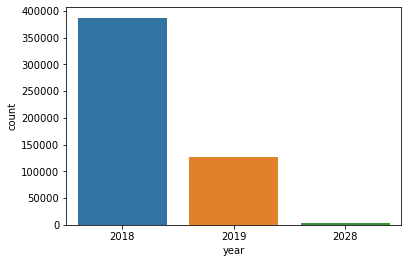

In [81]:
#number of orders per year
sns.countplot(df_n4['year'])
#2018 was the year which had the higest number of orders

#### An anamoly of transactions dated to 2028 has been detected

In [82]:
sum(df_n4['year'] == '2028')

2825

In [83]:
#lets drop the 2028 year transactions
future = df_n4[df_n4['year'] == '2028'].index
df_n4.drop(future,inplace=True)

In [84]:
sum(df_n4['year'] == '2028')

0

#### Frequency of orders per month

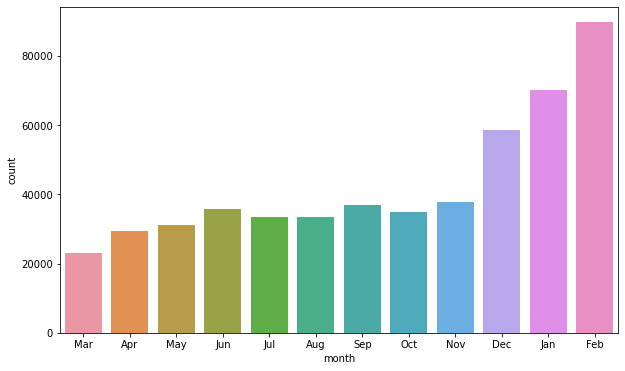

In [85]:
plt.figure(figsize=(10,6))
sns.countplot(df_n4['month'],order=['Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb'])

#### we can see that the orders are considerably higher during the winter holiday season

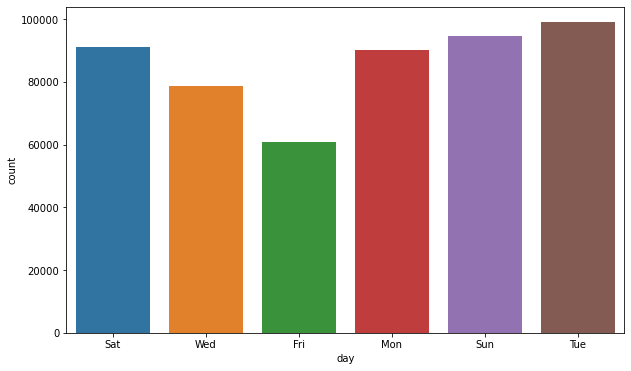

In [87]:
#lets check the orders per day
plt.figure(figsize=(10,6))
sns.countplot(df_n4['day'])

#### by observing the plot no orders were placed on a thursday and most number of orders were placed on tuesday

In [89]:
box=df_n4.sort_values(by='CostPerItem',ascending=False).tail(500000)

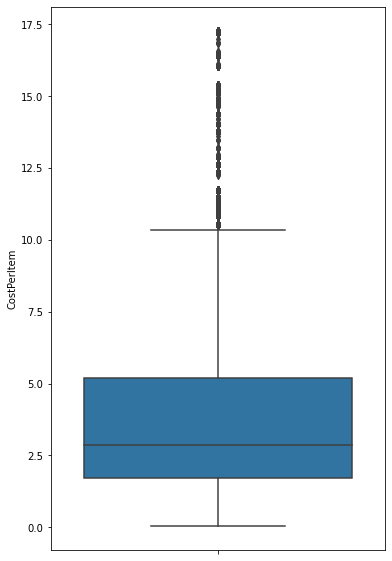

In [90]:
#lets observe a box plot for the costperitem for 500k transactions without the top expensive items
plt.figure(figsize=(6,10))
sns.boxplot(box['CostPerItem'],orient='v')

#### the median costperitem is around 2.8 which is on the relatively cheaper side with maximum being around 10 excluding the outliers

#### countries with higest frequency of transactions

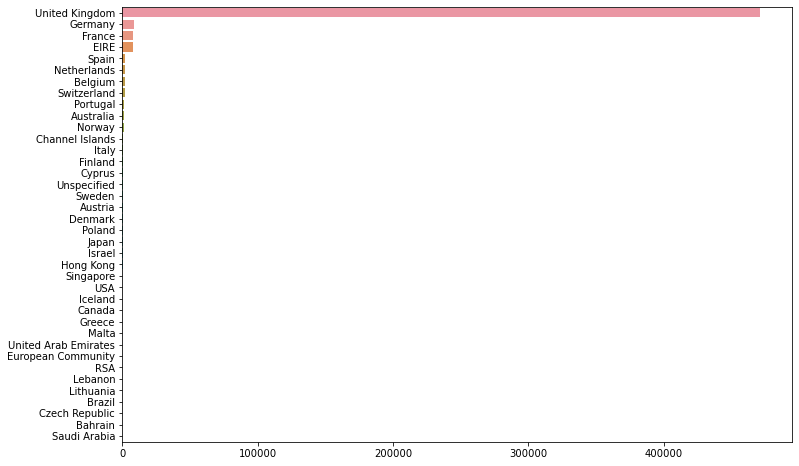

In [101]:
plt.figure(figsize=(12,8))
sns.barplot(x=df_n4['Country'].value_counts().values,y=df_n4['Country'].value_counts().index)

### The United Kingdom has the highest number of transactions

#### the countries transactions withour UK

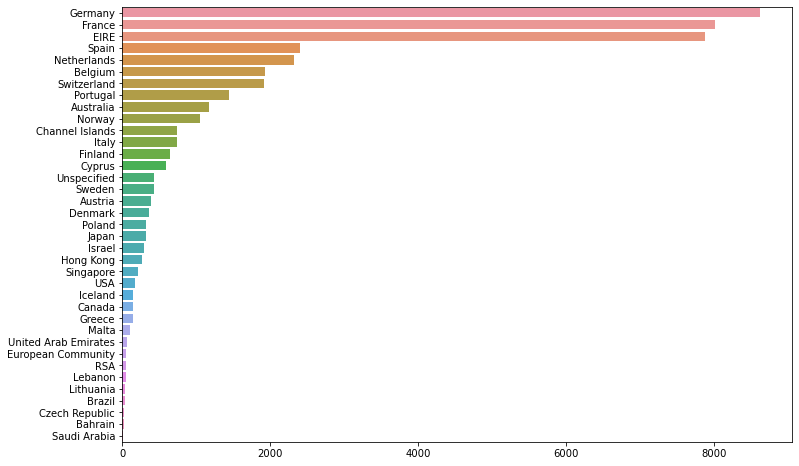

In [105]:
plt.figure(figsize=(12,8))
sns.barplot(x=df_n4['Country'].value_counts().values[1:],y=df_n4['Country'].value_counts().index[1:])

#### Germany,France and EIRE follow United Kingdom as the countries with highest number of transactions

In [126]:
df_n4.to_csv('transaction_cleaned.csv')